# How to work with Thermal Images

In [1]:
import skimage
from matplotlib import pyplot as plt

In [7]:
img_path = r'C:\Users\yansari\Desktop\Workstation\Thermal Homography\Dataset\Dataset June2024\June02_12pm\30\20240602_104421_868_R.jpg'

## We can visualize a thermal image using skimage


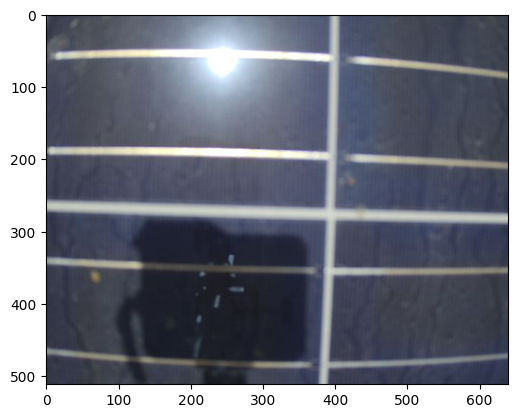

In [8]:
tim = skimage.io.imread(f'{img_path}')
plt.imshow(tim)
plt.show()

## We can extract the raw thermal values

In [14]:
import numpy as np
from tifffile import imsave, imread
import glob
from timeit import default_timer as timer
import os.path

import subprocess
import json
import io
from PIL import Image
from math import sqrt, exp, log
from matplotlib import cm
from matplotlib import pyplot as plt

In [16]:
%%time
def raw_to_thermal(filename):
    exiftool_path = r'C:\Users\yansari\AppData\Local\anaconda3\envs\Python_3.11\Scripts\exiftool.exe'

    """
    extracts the thermal image as 2D numpy array with temperatures in oC
    """

    # read image metadata needed for conversion of the raw sensor values
    # E=1,SD=1,RTemp=20,ATemp=RTemp,IRWTemp=RTemp,IRT=1,RH=50,PR1=21106.77,PB=1501,PF=1,PO=-7340,PR2=0.012545258
    meta_json = subprocess.check_output(
        [exiftool_path, filename, '-Emissivity', '-SubjectDistance', '-AtmosphericTemperature',
         '-ReflectedApparentTemperature', '-IRWindowTemperature', '-IRWindowTransmission', '-RelativeHumidity',
         '-PlanckR1', '-PlanckB', '-PlanckF', '-PlanckO', '-PlanckR2', '-j','-Model'])
    meta = json.loads(meta_json.decode())[0]

    # exifread can't extract the embedded thermal image, use exiftool instead
    thermal_img_bytes = subprocess.check_output([exiftool_path, "-RawThermalImage", "-b", filename])
    thermal_img_stream = io.BytesIO(thermal_img_bytes)

    thermal_img = Image.open(thermal_img_stream)
    thermal_np = np.array(thermal_img)
    return thermal_np

CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
def raw_to_rgb(filename):
    exiftool_path = r'C:\Users\yansari\AppData\Local\anaconda3\envs\Python_3.11\Scripts\exiftool.exe'

    """
    extracts the thermal image as 2D numpy array with temperatures in oC
    """

    # read image metadata needed for conversion of the raw sensor values
    # E=1,SD=1,RTemp=20,ATemp=RTemp,IRWTemp=RTemp,IRT=1,RH=50,PR1=21106.77,PB=1501,PF=1,PO=-7340,PR2=0.012545258
    meta_json = subprocess.check_output(
        [exiftool_path, filename, '-EmbeddedImageHeight', '-EmbeddedImageWidth', '-j','-Model'])
    meta = json.loads(meta_json.decode())[0]
    print(meta)

    # exifread can't extract the embedded thermal image, use exiftool instead
    thermal_img_bytes = subprocess.check_output([exiftool_path, "-EmbeddedImage", "-b", filename])
    thermal_img_stream = io.BytesIO(thermal_img_bytes)

    thermal_img = Image.open(thermal_img_stream)
    thermal_np = np.array(thermal_img)
    return thermal_np

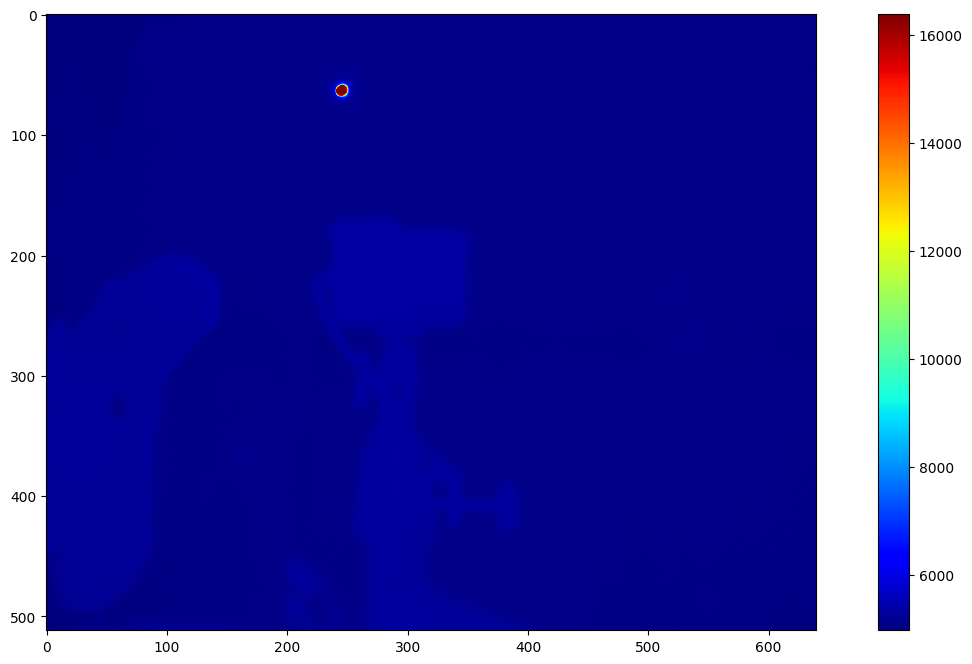

In [21]:
rawdata = raw_to_thermal(f'{img_path}')
plt.figure(figsize=(16, 8))
plt.imshow(rawdata, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

## We can extract the visible image

{'SourceFile': 'C:/Users/yansari/Desktop/Workstation/Thermal Homography/Dataset/Dataset June2024/June02_12pm/30/20240602_104421_868_R.jpg', 'EmbeddedImageHeight': 3000, 'EmbeddedImageWidth': 4000, 'Model': 'Duo Pro R'}


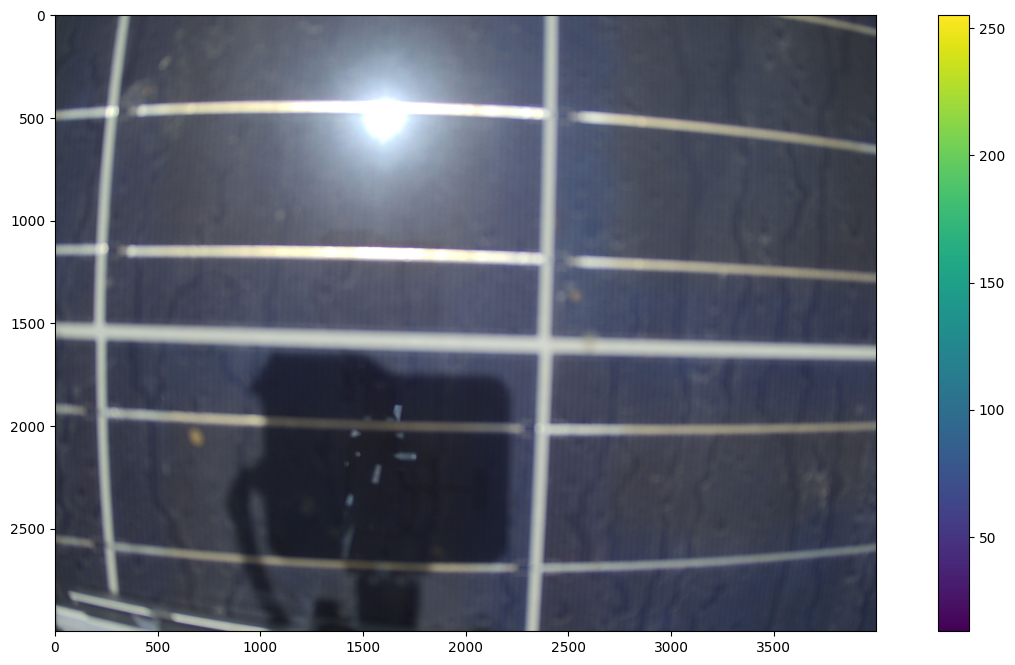

In [22]:
rgbim = raw_to_rgb(f'{img_path}')
plt.figure(figsize=(16, 8))
plt.imshow(rgbim)
plt.colorbar()
plt.show()